In [29]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from csm_toolbox import *
from utils import *
from tqdm import tqdm

plt.rcParams['text.usetex'] = True
%config InlineBackend.figure_format = 'svg'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Playground Notebook for the article :

## *"Leveraging Data Geometry to Mitigate CSM in Steganalysis"*

Through this notebook you will be able to retrieve some results we showed in the article.

Please note that some functions of the notebooks are written in ```utils.py```.


### I - Let's play with the PE Matrix

The sources were built developing the 2000 RAW from ALASKA listed in the file ```RAW_SOURCE_DATABASE.csv``` following the pipelines listed in ```pipelines.csv```.

As a starting point, you can use the PE matrix we obtained following the protocol in the Section II of our article called ```PE_1000_UERD_0.5_bpnzac_DCTR_Logistic_Regression.txt``` .

To be able to use our methods, start to load your matrix with ```np.loadtxt``` and use it to initialize an object from the ```CSM``` class 


In [2]:
csm_study=CSM(np.loadtxt('Data/PE_1000_UERD_0.5_bpnzac_DCTR_Logistic_Regression.txt',delimiter=','))

The matrix provided will be load in the attribute ```csm_matrix``` of your instance.

You can also get access to the regret matrix pretty easily using the attribute ```regret_matrix``` of your current instance.

In [3]:
csm_study.regret_matrix

array([[ 0. ,  0.2, -0.3, ...,  9.5, 10.1, 12.1],
       [-0.1,  0. , -0.4, ...,  9.9, 10.2, 11.8],
       [ 0. ,  0.1,  0. , ...,  9.8,  9.6, 12.7],
       ...,
       [23.9, 24.3, 22.5, ...,  0. ,  0.7, -0.3],
       [24.6, 24.8, 23.2, ...,  0.7,  0. ,  0.9],
       [23. , 23.2, 21.9, ..., -0.3, -0.6,  0. ]])

If you want to know the regret we got training on source $i$ and evaluating on source $j$, just call ```csm_study.regret_matrix[i,j]```.

In [4]:
csm_study.regret_matrix[26,52]

10.0

This matrix could be very useful to understand the potential of some development pipelines compared to others. 

**Don't hesitate to use it to derive your own conclusions**

The dataframe ```pipelines.csv``` provide details about the pipelines we used for our universe.

In [5]:
df=pd.read_csv('Data/pipelines.csv')

df.sample(10)

,ID,Cropping,Denoising,PostResizeSharpening,JPEG,code
620,620,790,7,0.010,85.0,crop=790_denoising=7_sharpening=0.01
913,913,930,4,0.507,85.0,crop=930_denoising=4_sharpening=0.507
301,301,651,1,0.176,85.0,crop=651_denoising=1_sharpening=0.176
619,619,790,4,1.500,85.0,crop=790_denoising=4_sharpening=1.5
788,788,837,26,1.334,85.0,crop=837_denoising=26_sharpening=1.334
297,297,604,30,1.169,85.0,crop=604_denoising=30_sharpening=1.169
777,777,837,23,1.169,85.0,crop=837_denoising=23_sharpening=1.169
692,692,790,30,0.341,85.0,crop=790_denoising=30_sharpening=0.341
627,627,790,7,1.169,85.0,crop=790_denoising=7_sharpening=1.169
236,236,604,10,1.003,85.0,crop=604_denoising=10_sharpening=1.003


The last column enables you to get the ID of a pipeline according to its parameter.

In [6]:
df[df.code=='crop=512_denoising=1_sharpening=0.672']

,ID,Cropping,Denoising,PostResizeSharpening,JPEG,code
4,4,512,1,0.672,85.0,crop=512_denoising=1_sharpening=0.672


### II - About some metrics correlated to the regret

In the paper, we explored to what extent $\ell^2_{CG}, \mathrm{MMD}$ and $\mathrm{NSCD}$ are invariant to cover-stego balancing and correlated to the regret.

#### 1 - Invariance to cover stego balancing

We propose here to check quickly cover-stego balancing.

In [7]:
l2=np.loadtxt('Data/l2.txt',delimiter=',')
MMD=np.loadtxt('Data/MMD.txt',delimiter=',')
NSCD=np.loadtxt('Data/NSCD.txt',delimiter=',')

You will find in each matrix 3000 columns. The first 1000 are for the **full cover case**, the middle ones are for the **full stego case** and the last ones are for the **mix case**.

In [8]:
is_invariant(l2,"l2")

For l2 : 

median full cover : 5.422
median full stego : 5.421
full cover - full stego = -0.05100 +/- 0.10425
-------
For l2 : 

median full cover : 5.422
median mix : 5.657
full cover - mix = -1.03300 +/- 2.62903
-------
For l2 : 

median full stego : 5.421
median mix : 5.657
full stego - mix = -0.96900 +/- 2.70878
-------


As explained in the paper, we observe that the $\ell^2_{CG}$ distance is the same for the case **"full cover"** and **"full stego"**. But there is a non negligeable difference between these two cases and the **mix case**.

On the contrary, as claimed in the paper, you can see below that the $\mathrm{MMD}$ and the $\mathrm{NSCD}$ are invariant to cover-stego balancing.

In [9]:
is_invariant(MMD,"MMD")
print('\n')
is_invariant(MMD,"NSCD")

For MMD : 

median full cover : 0.89
median full stego : 0.891
full cover - full stego = -0.00300 +/- 0.03770
-------
For MMD : 

median full cover : 0.89
median mix : 0.89
full cover - mix = -0.00200 +/- 0.01962
-------
For MMD : 

median full stego : 0.891
median mix : 0.89
full stego - mix = 0.00200 +/- 0.01809
-------


For NSCD : 

median full cover : 0.89
median full stego : 0.891
full cover - full stego = -0.00300 +/- 0.03770
-------
For NSCD : 

median full cover : 0.89
median mix : 0.89
full cover - mix = -0.00200 +/- 0.01962
-------
For NSCD : 

median full stego : 0.891
median mix : 0.89
full stego - mix = 0.00200 +/- 0.01809
-------


### 2 - Correlation to the Regret

We propose here to reproduce the illustrations given in the article and give you the possibility to change some parameters to disclose other things.

(0.0, 22.0)

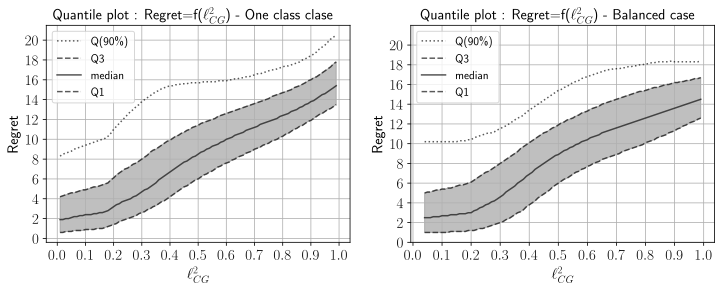

In [10]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
M=l2[:,0:1000].max()
N1=median_plot(l2[:,0:1000]/M,csm_study.regret_matrix,'$\ell^2_{CG}$',slide=0.15,gap=0.01,alpha=0.65,fontsize=15)
plt.title('Quantile plot : Regret=f($\ell^2_{CG}$) - One class clase',fontsize=15);
plt.xticks(np.arange(0,1.1,0.1),fontsize=15)
plt.yticks(np.arange(0,22,2),fontsize=15)

plt.subplot(1,2,2)
M=l2[:,2000:3000].max()
N2=median_plot(l2[:,2000:3000]/M,csm_study.regret_matrix,'$\ell^2_{CG}$',slide=0.15,gap=0.01,alpha=0.65,fontsize=15)
plt.title('Quantile plot : Regret=f($\ell^2_{CG}$) - Balanced case',fontsize=15)
plt.xticks(np.arange(0,1.1,0.1),fontsize=15)
plt.yticks(np.arange(0,22,2),fontsize=15)
plt.ylim(0,22)

#plt.savefig('Figures/l2_plot.pdf');

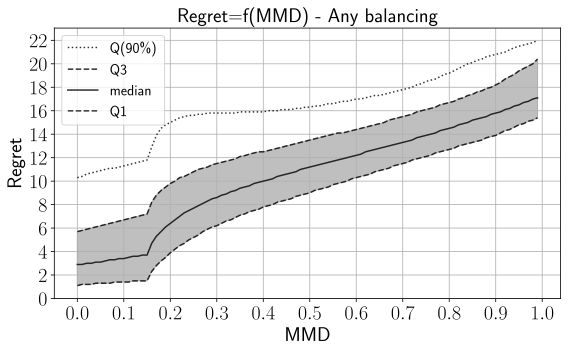

In [16]:
plt.figure(figsize=(8,5))
M=MMD[:,0:1000].max()
N2=median_plot(MMD[:,0:1000]/M,csm_study.regret_matrix,'MMD',slide=0.15,gap=0.01,fontsize=20)
plt.title('Regret=f(MMD) - Any balancing',fontsize=20)
plt.xticks(np.arange(0,1.1,0.1),fontsize=20)
plt.yticks(np.arange(0,24,2),fontsize=20)
plt.tight_layout()
#plt.savefig('Figures/MMD_plot.pdf');

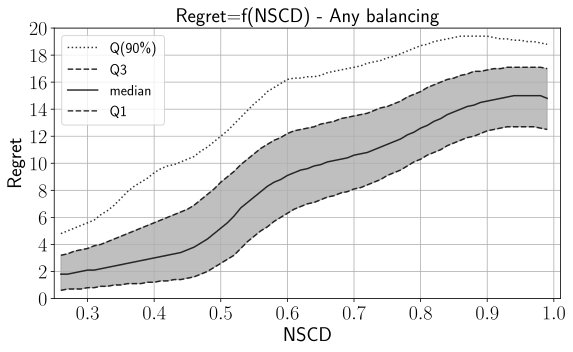

In [12]:
plt.figure(figsize=(8,5))
M=NSCD[:,0:1000].max()
N2=median_plot(NSCD[:,0:1000]/M,csm_study.regret_matrix,'NSCD',slide=0.15,gap=0.01,fontsize=20)
plt.title('Regret=f(NSCD) - Any balancing',fontsize=20)
plt.xticks(np.arange(0.3,1.1,0.1),fontsize=20)
plt.yticks(np.arange(0,22,2),fontsize=20)
plt.tight_layout()
plt.ylim(0,20)
plt.xlim(0.25,1.01)
plt.savefig('Figures/NSCD_plot.pdf');

All the metrics are correlated to the regret but the NSCD is the most correlated one. You can see it pretty easily looking at the variance around the low values of each metric.

## III - Comparison with state of the art



In this part, we propose to reproduce the results from Section IV. 

What happens if for each target from our universe we select the source that minimises its l2/MMD/NSCD distance for the learning ?

To what extent is it better or worse than traditional atomistic strategies ?

Let's see that again !

### 1 - Comparison between distances

**As explained in the paper, for the first question, we are going to exclude from our analysis the sources too close with the targets in order to unbias our results. To spot them, we propose simply to reject the first decile of the MMD distribution**

We propose you to use our function ```unbias_and_describe``` to get information about the resulting regret distribution in each case.

Please note that the two first parameters enables to select the balancing of the operational set (**"full cover", "full stego" and "balanced mixture")**

In [20]:
threshold=np.quantile(MMD[:,1000:2000],0.1)

unbias_and_describe(0,1000,l2,threshold,csm_study)

Min : 0.0
Q1 : 1.1
Median : 2.6
Q3 : 4.0
Max : 27
% (R>5%) : 16.0


In [22]:
unbias_and_describe(1000,2000,MMD,threshold,csm_study)

Min : 0.0
Q1 : 0.3
Median : 1.4
Q3 : 2.7
Max : 19
% (R>5%) : 7.9


In [24]:
unbias_and_describe(2000,3000,NSCD,threshold,csm_study)

Min : 0.0
Q1 : 0.1
Median : 0.7
Q3 : 1.4
Max : 16
% (R>5%) : 2.0


You can check that these information are consistent with the tables shared and try other combinations if you want.

### 2 - Comparison with SOTA in atomistic steganalysis

In the paper we proposed to compare the selection using the minimal NSCD against two famous strategies in the litterature : 

- Using a relevant source for each target image with the help of a multi-classiﬁer trained to recognize the most representatives sources of our universe.

- Applying a majority vote to choose one relevant source for the target among the most representatives ones.

When we talk about the most representatives sources, we are refering to our previous work accessible [here](https://hal.science/hal-03840926/).

You can use the code below to retrieve these 8 representative sources

In [223]:
greedy_covering,labels,labels_assignement=csm_study.greedy_covering(epsilon=5)
print("Number of representatives : ",len(labels))
print(greedy_covering.keys())

Max max regrets :  5.0
Minimum number of sources for the optimal covering : 2.0
Number of representatives :  8
dict_keys([733, 33, 74, 20, 963, 94, 615, 4])


Since retrieving the results of this part involves to simply load specific files, we let you with the information of table I.

## IV - Simulated Annealing for Data-Adaptation

The experiment presented here is associated to Section IV-B

Knowing that the NSCD is well correlated to the regret, we propose here to see what happens if we used that metric to guide a simulated annealing on our 1.000 sources. 

In [33]:
Crop=np.linspace(512,930,10).astype(int)
Denoising=np.linspace(1,30,10).astype(int)
Sharpening=np.linspace(0.01,1.5,10)

#we associate each pipelines to a set of 3 integers representing the 3 values of the parameters 
#to choose

#Then, we can use the function below to retrieve the parameters knowing the set of integers
def build_name_from_parameters(parameters):
    if (int(Sharpening[parameters[2]])==Sharpening[parameters[2]]):
        name=f'crop={Crop[parameters[0]]}_denoising={Denoising[parameters[1]]}_sharpening={Sharpening[parameters[2]]}'
    else:
        name=f'crop={Crop[parameters[0]]}_denoising={Denoising[parameters[1]]}_sharpening={round(float(np.clip(Sharpening[parameters[2]],0.01,2)),3)}'
    return name


#to make things easier, let's create a dictionary mapping the pipeline to its set of integers

code_to_pipelines={}
for i in range(0,10):
    for j in range(0,10):
        for k in range(0,10):
            parameters=[i,j,k]
            source_name=build_name_from_parameters(parameters)
            source_id=np.where(sources==source_name)[0][0]
            code_to_pipelines[source_id]=[i,j,k]

In [34]:
def add_random_noise(rs,old_parameters,scale=1):
    '''
    rs: Random state initialized with a seed
    old_parameters: the parameters of the current candidate in our search
    scale: a parameter controlling the strength of the exploration
    
    This function takes as inputs the parameters of the current candidate in our search 
    and returns the parameters of the new candidate with a random move controlled by the scale.
    '''
    new_parameters=old_parameters.copy()
    new_parameters[0]+=rs.choice([-1,1])*rs.randint(1,scale)
    new_parameters[1]+=rs.choice([-1,1])*rs.randint(1,scale)
    new_parameters[2]+=rs.choice([-1,1])*rs.randint(1,scale)
    new_parameters=np.array(new_parameters)
    new_parameters=np.clip(new_parameters,0,9)

    return new_parameters

sources=df.code.values.reshape(-1)

def compute_chordal_distance(source_parameters,target_parameters):
    '''
    source_parameters: parameters of the source in string
    target_parameters: parameters of the target in string
    
    
    This function takes as inputs the parameters of the source and the target and returns the chordal 
    distance between the source and the operational target.
    '''
    
    source_name=build_name_from_parameters(source_parameters)
    target_name=build_name_from_parameters(target_parameters)
    source_id=np.where(sources==source_name)[0][0]
    target_id=np.where(sources==target_name)[0][0]
    return NSCD[source_id,target_id]


def compute_regret(source_parameters,target_parameters):
    '''
    source_parameters: parameters of the source in string
    target_parameters: parameters of the target in string
    
    
    This function takes as inputs the parameters of the source and the target and returns the regret
    between the source and the "evaluation" target .
    '''
    
    source_name=build_name_from_parameters(source_parameters)
    target_name=build_name_from_parameters(target_parameters)
    source_id=np.where(sources==source_name)[0][0]
    target_id=np.where(sources==target_name)[0][0]
    return csm_study.regret_matrix[source_id,target_id]
    

def simulated_annealing(initial_parameters,target_parameters,initial_temp,max_iter=1000):
    '''
    initial_parameters: the parameters of the first candidate in our search
    target_parameters: the parameters of the target
    initial_temp: the initial temperature used for the simulated annealing
    max_iter : maximum number of iteration
    
    This function performs a simulated annealing using our 1000 sources starting from the 
    initial parameters with a maximal number of iteration max_iter. Ideally, it enables us to find
    a source with a low regret to our target minimizing the chordal distance between each candidate 
    and the target.
    '''
    
    rs=np.random.RandomState(0)
    rs.seed(0)

    cpt=0

    all_candidates=[]
    all_chordal_distances=[]
    all_regrets=[]

    best_candidates=[]
    best_regrets=[]
    best_chordal_distance=[]

    old_parameters=initial_parameters
    old_chordal_distance = compute_chordal_distance(initial_parameters,target_parameters)
    old_regret = compute_regret(initial_parameters,target_parameters)

    temp=initial_temp

    
    all_candidates.append(initial_parameters)
    all_chordal_distances.append(old_chordal_distance)
    all_regrets.append(old_regret)
    
    new_chordal_distance=1
    N_iter_until_conv=1
    
    while (cpt!=max_iter):
        cpt+=1

        #print(np.exp(-(new_chordal_distance-old_chordal_distance)/temp))
        
        new_candidate_parameters=add_random_noise(rs,old_parameters,scale=2)
        new_chordal_distance = compute_chordal_distance(new_candidate_parameters,target_parameters)
        new_regret = compute_regret(old_parameters,new_candidate_parameters)
        
        if new_chordal_distance<old_chordal_distance:
              
            best_candidates.append(new_candidate_parameters)
            best_regrets.append(new_regret)
            best_chordal_distance.append(new_chordal_distance)

            old_chordal_distance=new_chordal_distance
            old_parameters=new_candidate_parameters
            old_regret=new_regret
            
            
            N_iter_until_conv=cpt
            
        else:
            
            if rs.random()<np.exp(-(new_chordal_distance-old_chordal_distance)/temp):

                old_chordal_distance=new_chordal_distance
                old_parameters=new_candidate_parameters
                old_regret=new_regret

                temp*=0.9
                
                N_iter_until_conv=cpt
        
        all_candidates.append(old_parameters)
        all_chordal_distances.append(old_chordal_distance)
        all_regrets.append(old_regret)
    
    return all_candidates,all_regrets,all_chordal_distances,N_iter_until_conv,all_regrets[np.argmin(all_chordal_distances)]

In [35]:
all_candidates,all_regrets,_,N_iter_until_conv,best_regret=simulated_annealing(initial_parameters=code_to_pipelines[0],
                                                                     target_parameters=code_to_pipelines[80],
                                                                     initial_temp=1,max_iter=100)

In [30]:
all_iterations2 = []
all_final_regrets2 = []
I1,I2=np.where(csm_study.regret_matrix>=20)

for s,t in tqdm(zip(I1,I2)):
    all_candidates,_,_,N_iter_until_conv,best_regret=simulated_annealing(initial_parameters=code_to_pipelines[s],
                                                                     target_parameters=code_to_pipelines[t],
                                                                     initial_temp=1,max_iter=100)
    
    all_iterations2.append(N_iter_until_conv)
    all_final_regrets2.append(best_regret)

30018it [11:43, 42.69it/s]


As explained in the paper, with a maximal number of iterations equals to 100, we can achieve regrets lower than 5% in 88% of the 30.018 most difficult cases where the regrets is higher than 20. 

In [38]:
(csm_study.regret_matrix>=20).sum()

30018

In [41]:
100*(1-(np.array(all_final_regrets2)>5).mean())

88.38696781930841

## V - Estimation of the NSCD when the operational target is small

In Section IV-C we explain that, with a very limited amount of target samples, the NSCD
is not well estimated and leads to less relevant source selection. 

We used previously 500 operational samples in the target set to compute our NSCD, what happens if we take less samples ?

Let's retrieve the results here !

In [44]:
NSCD_10=np.loadtxt('Data/NSCD_N_10.txt',delimiter=',')
NSCD_100=np.loadtxt('Data/NSCD_N_100.txt',delimiter=',')
NSCD_500=np.loadtxt('Data/NSCD.txt',delimiter=',')

In [50]:
print('N_operational = 10 samples \n')
print('FULL COVER')
unbias_and_describe(0,1000,NSCD_10,threshold,csm_study)
print('\n FULL STEGO')
unbias_and_describe(1000,2000,NSCD_10,threshold,csm_study)
print('\n FULL MIX')
unbias_and_describe(2000,3000,NSCD_10,threshold,csm_study)

N_operational = 10 samples 

FULL COVER
Min : 0.0
Q1 : 3.0
Median : 4.7
Q3 : 6.9
Max : 27
% (R>5%) : 44.9

 FULL STEGO
Min : 0.0
Q1 : 3.0
Median : 4.6
Q3 : 6.7
Max : 27
% (R>5%) : 43.7

 FULL MIX
Min : 0.0
Q1 : 0.7
Median : 2.3
Q3 : 4.8
Max : 24
% (R>5%) : 23.799999999999997


In [52]:
print('N_operational = 100 samples \n')
print('FULL COVER')
unbias_and_describe(0,1000,NSCD_100,threshold,csm_study)
print('\n FULL STEGO')
unbias_and_describe(1000,2000,NSCD_100,threshold,csm_study)
print('\n FULL MIX')
unbias_and_describe(2000,3000,NSCD_100,threshold,csm_study)

N_operational = 100 samples 

FULL COVER
Min : 0.0
Q1 : 0.1
Median : 0.8
Q3 : 1.7
Max : 16
% (R>5%) : 2.7

 FULL STEGO
Min : 0.0
Q1 : 0.1
Median : 0.8
Q3 : 1.6
Max : 16
% (R>5%) : 2.5

 FULL MIX
Min : 0.0
Q1 : 0.3
Median : 1.0
Q3 : 1.8
Max : 16
% (R>5%) : 4.6


In [53]:
print('N_operational = 500 samples (like before) \n')
print('FULL COVER')
unbias_and_describe(0,1000,NSCD_500,threshold,csm_study)
print('\n FULL STEGO')
unbias_and_describe(1000,2000,NSCD_500,threshold,csm_study)
print('\n FULL MIX')
unbias_and_describe(2000,3000,NSCD_500,threshold,csm_study)

N_operational = 500 samples (like before) 

FULL COVER
Min : 0.0
Q1 : 0.1
Median : 0.7
Q3 : 1.5
Max : 16
% (R>5%) : 1.6

 FULL STEGO
Min : 0.0
Q1 : 0.1
Median : 0.7
Q3 : 1.5
Max : 16
% (R>5%) : 1.5

 FULL MIX
Min : 0.0
Q1 : 0.1
Median : 0.7
Q3 : 1.4
Max : 16
% (R>5%) : 2.0
